# Principal Component Analysis:
## `Understanding & Applying to Neuroscience Data`

---
`Author: Jeremy Grace`



# $$PCA :\ Applying\ to\ Neuroscience\ Data$$

![brain-scan](img/fmri.byu.png)

## Briefing Outline:

### 1. Applying the $\underline{Process}$
        * Introduce the Source & Scope
        * Load - Prep - Run
        * Visualize & Validate

### 2. Derive $\underline{Insights}$
        * Interpret the Results
        * Personal Takeaways
        * Next Steps

---
## $$Applying\ the\ Process$$

## Abstract: 
### `Dataset: The Aging, Dementia and Traumatic Brain Injury Study`

$\href{http://brain-map.org/}{brain-map.org}$

$\href{http://aging.brain-map.org/overview/home}{aging.brain-map.org}$

<br>

>For my final project, I will be implementing the Principal component analysis (PCA) algorithm from the sklearn.decomposition module. The dataset I will be utilizing was produced from a collaborative study on Aging, Dementia, and Traumatic Brain Injury (see aging.brain-map.org, datasets on Download tab). Although my background isn't in the arena of neuroscience, the topic hits me on a personal level. My grandfather passed away as a result of Alzheimer's disease and I have always wanted to understand the illness more since there is a chance myself or another family member might fall victim to it.
The rationale behind my choice of algorithm is primarily due to the use of Singular Value Decomposition (SVD) 'under-the-hood' to repurpose the continuous data into fewer principal components - keeping only the most significant singular vectors at a lower dimensionality. Since the study retrieved numerous quantification and metric values, an operation like PCA is ideal to reduce this data for initial insight and prep it for additional analysis (e.g. K-means Clustering ).

# `Scope`:

* **Specimen (Donor) Metadata**


* **Protein & Pathology data**


* _RNA-seq_

---
## `Load Clean & Data`

**Summary information on specimens, neuropathology, and quantification of protein and isoprostane**:

* Donor Information:

https://s3-us-west-2.amazonaws.com/msds-projects/data/Donor-Information.csv

* Protein & Pathology Readings:

https://s3-us-west-2.amazonaws.com/msds-projects/data/Protein-And-Pathology-Quantifications.csv

* Description of Strains [Column Descriptions]:

https://s3-us-west-2.amazonaws.com/msds-projects/data/Description-Of-Stains.csv

In [1]:
%pylab inline

import pandas as pd
from scipy import stats
import seaborn as sns
from sqlalchemy import create_engine

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Populating the interactive namespace from numpy and matplotlib


### $$ -- \ Load\ Data\ -- $$

In [2]:
donor_info = pd.read_csv('https://s3-us-west-2.amazonaws.com/msds-projects/data/Donor-Information.csv')
ppq = pd.read_csv('https://s3-us-west-2.amazonaws.com/msds-projects/data/Protein-And-Pathology-Quantifications.csv')

In [3]:
donor_info.head()

,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
1,326765656,H14.09.069,95-99,M,N,17,12,1-2 min,2,1,No Dementia,26,No Dementia,Y,White,Not Hispanic,No Dementia,5,2
2,326765654,H14.09.067,85,M,Y,10,72,< 10 sec,3,1,Vascular,25,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,4,2
3,467056391,H15.09.103,90-94,F,N,11,87,< 10 sec,0,1,No Dementia,52,No Dementia,Y,White,Not Hispanic,No Dementia,4,0
4,309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2


In [4]:
ppq.head()

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_a_beta_ffpe,ihc_ptdp_43_ffpe,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
0,467056408,H15.09.109,10294,HIP,0.003079,0.003880,0.025751,0.021730,0.007529,0.001003,...,0.00,24.38,0.151900,0.147220,3.24,0.02,3.113225,44.83,2.50,0.160250
1,326765657,H14.09.070,10557,FWM,0.000110,0.003159,0.001307,0.000115,0.003359,0.003090,...,0.88,11.58,0.618094,0.051980,0.64,15.26,1.920750,0.00,10.84,0.450625
2,326765681,H14.09.094,10235,TCx,0.000465,0.001343,0.003324,0.000036,0.011338,0.001297,...,2.68,10.04,1.429312,0.020000,0.60,52.94,0.020000,11.90,12.86,286.210125
3,326765667,H14.09.080,10235,TCx,0.000056,0.001691,0.017386,0.000048,0.003371,0.001614,...,0.00,82.18,0.218400,0.080000,0.66,10.14,0.080000,12.54,17.10,0.160875
4,309335488,H14.09.051,10557,FWM,0.000162,0.001303,0.001567,0.000079,0.003648,0.000757,...,0.52,11.76,0.307125,0.095635,0.00,28.28,3.146120,6.00,36.26,0.650025


---
### $$ -- \ Prep\ Data\  --$$

In [5]:
ppq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 33 columns):
donor_id                 377 non-null int64
donor_name               377 non-null object
structure_id             377 non-null int64
structure_acronym        377 non-null object
ihc_a_syn                377 non-null float64
ihc_tau2_ffpe            356 non-null float64
ihc_at8_ffpe             361 non-null float64
ihc_at8                  377 non-null float64
ihc_a_beta_ffpe          355 non-null float64
ihc_ptdp_43_ffpe         362 non-null float64
ihc_a_beta               377 non-null float64
ihc_iba1_ffpe            363 non-null float64
ihc_gfap_ffpe            345 non-null float64
ptau_ng_per_mg           332 non-null float64
vegf_pg_per_mg           332 non-null float64
ab42_over_ab40_ratio     327 non-null float64
tnf_a_pg_per_mg          332 non-null float64
tau_ng_per_mg            326 non-null float64
il_10_pg_per_mg          332 non-null float64
isoprostane_pg_per_mg    13

### $$Imputation$$
### $$"\ It's\ a\ \underline{NaN}\ problem!\ "$$

`Options:`

1. Remove the entries with missing data
2. Take the means of the respective column and imput the mean in each
3. Perform a `K-Nearest Neighbor` to be even more precise with the imputted value

>Given the size of my dataset with the number of missing values and time constraints, 

>I decided on the second option - _to imput the respective means_ - utliziing $\href{http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html}{pandas.Dataframe.fillna()}$.

In [6]:
full_ppq = ppq.fillna(ppq.mean()) # Use fillna method with mean to imput the respective means

In [7]:
full_ppq.isnull().values.any() # No more null values

False

In [10]:
full_ppq.ptau_ng_per_mg.count() # Filled missing values within dropping entries, see this protein above as reference

377

---
## `Load Clean data into SQL`

In [11]:
engine = create_engine('sqlite:///brainmap.db')
conn = engine.connect()

In [12]:
# Call to DROP donor TABLE, if necessary
conn.execute("DROP TABLE IF EXISTS donor")

# Call to DROP readings TABLE, if necessary
conn.execute("DROP TABLE IF EXISTS readings");

In [13]:
# Create two tables - 1) donor & 2) readings - in brainmap database 
## [[ only run this once! ]]

donor_info.to_sql('donor', conn)
full_ppq.to_sql('readings', conn)

---
# Establish Observation Groups

> 1. Donors  $\underline{with}$  Traumatic brain inquiry ( TBI )
> 2. Donors  $\underline{without}$  Traumatic brain inquiry ( TBI )

## `Separating Donors into Groups: With TBI & Without TBI`

### [ STEP 1 ]  Join Tables Into One Observational DataFrame
<br>
* Create `obs_join` as Joined Dataframe

In [14]:
obs_join = pd.read_sql_query("SELECT D.name, D.longest_loc_duration, D.nincds_arda_diagnosis, R.* FROM donor as D JOIN readings as R ON D.name = R.donor_name ORDER BY D.donor_id", con='sqlite:///brainmap.db')

* Drop noise columns - unnecessary columns - from the new dataframe

In [23]:
# Remove redundant columns from new Dataframe
obs_join.drop('donor_name', axis=1, inplace=True) # Donor_name from readings table
obs_join.drop('index', axis=1, inplace=True) # Index from readings table

obs_join.drop('ab42_over_ab40_ratio', axis=1, inplace=True) # Ratio Noise of ab42/ab42
obs_join.drop('ptau_over_tau_ratio', axis=1, inplace=True) # Ratio Noise of ptau/ptau
obs_join.head()

,name,longest_loc_duration,nincds_arda_diagnosis,donor_id,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
0,H14.09.001,> 1 hr,No Dementia,309335438,10208,PCx,0.000103,0.002360,0.000789,0.000095,...,0.00,56.28,0.621950,0.046742,0.02,24.54,2.60468,10.26,7.82,31.100787
1,H14.09.001,> 1 hr,No Dementia,309335438,10294,HIP,0.001042,0.008601,0.023308,0.022335,...,0.00,22.04,0.746850,0.411676,1.06,1.36,4.19939,51.08,0.16,0.235788
2,H14.09.001,> 1 hr,No Dementia,309335438,10235,TCx,0.000138,0.001742,0.007628,0.000090,...,0.86,62.82,0.000000,0.020000,0.44,27.68,0.02000,12.34,24.74,0.078225
3,H14.09.001,> 1 hr,No Dementia,309335438,10557,FWM,0.000104,0.002030,0.000677,0.000060,...,0.02,43.98,0.322081,0.070502,0.00,34.22,2.92748,10.42,10.54,0.225300
4,H14.09.002,Unknown or N/A,Probable Alzheimer'S Disease,309335439,10235,TCx,0.000060,0.001868,0.004853,0.000211,...,0.02,23.44,0.946400,0.030000,0.28,55.26,0.03000,8.06,17.30,2.051156


### [ STEP 2 ]  Separate Donors into Two Subgroup: $\hspace{0.5cm}$  `TBI & Without TBI`
<br>
* Parse out _Unknown or N/A != **With TBI**_ from dataframe

In [24]:
# Extracting the 'with TBI' subgroup
tbi = obs_join[obs_join['longest_loc_duration'] != 'Unknown or N/A']
tbi.head()

,name,longest_loc_duration,nincds_arda_diagnosis,donor_id,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
0,H14.09.001,> 1 hr,No Dementia,309335438,10208,PCx,0.000103,0.002360,0.000789,0.000095,...,0.00,56.28,0.621950,0.046742,0.02,24.54,2.60468,10.26,7.82,31.100787
1,H14.09.001,> 1 hr,No Dementia,309335438,10294,HIP,0.001042,0.008601,0.023308,0.022335,...,0.00,22.04,0.746850,0.411676,1.06,1.36,4.19939,51.08,0.16,0.235788
2,H14.09.001,> 1 hr,No Dementia,309335438,10235,TCx,0.000138,0.001742,0.007628,0.000090,...,0.86,62.82,0.000000,0.020000,0.44,27.68,0.02000,12.34,24.74,0.078225
3,H14.09.001,> 1 hr,No Dementia,309335438,10557,FWM,0.000104,0.002030,0.000677,0.000060,...,0.02,43.98,0.322081,0.070502,0.00,34.22,2.92748,10.42,10.54,0.225300
8,H14.09.003,10 min - 1 hr,No Dementia,309335440,10235,TCx,0.000048,0.004628,0.001255,0.001448,...,0.62,67.32,0.000000,0.020000,0.70,134.70,0.02000,15.00,11.10,37.363613


In [25]:
print('TBI group:', tbi['name'].count())

TBI group: 155


* Parse out _Unknown or N/A = **Without TBI**_ from dataframe

In [26]:
# Extracting the 'without TBI' subgroup 
wo_tbi = obs_join[obs_join['longest_loc_duration'] == 'Unknown or N/A']
wo_tbi.head()

,name,longest_loc_duration,nincds_arda_diagnosis,donor_id,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
4,H14.09.002,Unknown or N/A,Probable Alzheimer'S Disease,309335439,10235,TCx,0.000060,0.001868,0.004853,0.000211,...,0.02,23.44,0.946400,0.030000,0.28,55.26,0.03000,8.06,17.30,2.051156
5,H14.09.002,Unknown or N/A,Probable Alzheimer'S Disease,309335439,10557,FWM,0.000064,0.003858,0.001381,0.000192,...,0.34,52.90,0.366506,0.050262,0.44,75.28,2.50784,12.94,8.96,1.333025
6,H14.09.002,Unknown or N/A,Probable Alzheimer'S Disease,309335439,10208,PCx,0.000072,0.003865,0.001862,0.000122,...,1.00,45.94,0.333188,0.047842,0.30,76.98,3.18572,12.74,18.18,0.469375
7,H14.09.002,Unknown or N/A,Probable Alzheimer'S Disease,309335439,10294,HIP,0.000122,0.008144,0.028297,0.057176,...,0.00,11.60,0.698975,0.060818,0.00,2.00,11.40098,112.92,0.72,0.308337
10,H14.09.004,Unknown or N/A,No Dementia,309335441,10235,TCx,0.000072,0.004197,0.005373,0.000889,...,0.00,25.64,1.474200,0.170000,0.00,24.28,0.17000,5.64,19.78,564.526462


In [27]:
print('Without TBI group:', wo_tbi['name'].count())

Without TBI group: 222


### [ STEP 3 ]  Subdivide Subgroups by Categories:  

>### Group1: $\hspace{0.5cm}$ `No Dementia`
>### Group2: $\hspace{0.5cm}$ `Dementia (Unknown)`
>### Group3: $\hspace{0.5cm}$ `Possible/Probable Alzheimer's`

##  `With TBI`

In [28]:
# --- No Dementia ---
tbi_nd = tbi[tbi['nincds_arda_diagnosis'] == "No Dementia"].ix[:,6:].values

# --- Dementia (Unknown)---
tbi_d = tbi[tbi['nincds_arda_diagnosis'] == "Dementia, Type Unknown"].ix[:,6:].values

# --- Possible/Probable Alzheimer's ---
tbi_ppa = tbi[(tbi['nincds_arda_diagnosis'] == "Probable Alzheimer'S Disease") | (tbi['nincds_arda_diagnosis'] == "Possible Alzheimer'S Disease")].ix[:,6:].values

In [29]:
print('TBI - No Dementia: {} entries x {} features'.format(tbi_nd.shape[0],tbi_nd.shape[1]), end='\n\n')
print('TBI - Dementia: {} entries x {} features'.format(tbi_d.shape[0],tbi_d.shape[1]), end='\n\n')
print("TBI - Alzheimer's: {} entries x {} features".format(tbi_ppa.shape[0],tbi_ppa.shape[1]), end='\n\n')

TBI - No Dementia: 75 entries x 27 features

TBI - Dementia: 20 entries x 27 features

TBI - Alzheimer's: 60 entries x 27 features



##  `Without TBI`

In [30]:
# --- No Dementia ---
wo_tbi_nd = wo_tbi[wo_tbi['nincds_arda_diagnosis'] == "No Dementia"].ix[:,6:].values

# --- Dementia (Unknown)---
wo_tbi_d = wo_tbi[wo_tbi['nincds_arda_diagnosis'] == "Dementia, Type Unknown"].ix[:,6:].values

# --- Possible/Probable Alzheimer's ---
wo_tbi_ppa = wo_tbi[(wo_tbi['nincds_arda_diagnosis'] == "Probable Alzheimer'S Disease") | (wo_tbi['nincds_arda_diagnosis'] == "Possible Alzheimer'S Disease")].ix[:,6:].values


In [31]:
print('Without TBI - No Dementia: {} entries x {} features'.format(wo_tbi_nd.shape[0],wo_tbi_nd.shape[1]), end='\n\n')
print('Without TBI - Dementia: {} entries x {} features'.format(wo_tbi_d.shape[0],wo_tbi_d.shape[1]), end='\n\n')
print("Without TBI - Alzheimer's: {} entries x {} features".format(wo_tbi_ppa.shape[0],wo_tbi_ppa.shape[1]), end='\n\n')

Without TBI - No Dementia: 118 entries x 27 features

Without TBI - Dementia: 12 entries x 27 features

Without TBI - Alzheimer's: 92 entries x 27 features



---
### $$ -- \ Run\ PCA\  --$$

## `Standardize Dataset`

**Rationle:** 
Since the features of my dataset have varying parameters of measurement, the data must first be standardized in order to successfully perform PCA.

##  `Standardize - With TBI`

* **BEFORE** Standardization

In [34]:
 # Parse out all of the feature entries by column (feature space)
print(tbi_nd[:1,18], end='\n\n')
print(tbi_d[:1,18], end='\n\n')
print(tbi_ppa[:1,18], end='\n\n')

[ 56.28]

[ 22.82]

[ 129.76]



* **AFTER** Standardization

In [35]:
tbi_ND = StandardScaler().fit_transform(tbi_nd)
tbi_D = StandardScaler().fit_transform(tbi_d)
tbi_PPA = StandardScaler().fit_transform(tbi_ppa)

print(tbi_ND[:1,18], end='\n\n')
print(tbi_D[:1,18], end='\n\n')
print(tbi_PPA[:1,18], end='\n\n')

[ 0.40633459]

[-0.65298711]

[ 2.31851049]



##  `Without TBI`

* **BEFORE** Standardization

In [24]:
 # Parse out all of the feature entries by column (feature space)
print(wo_tbi_nd[:1,18], end='\n\n')
print(wo_tbi_d[:1,18], end='\n\n')
print(wo_tbi_ppa[:1,18], end='\n\n')

[ 25.64]

[ 10.76]

[ 23.44]



* **AFTER** Standardization

In [36]:
wo_tbi_ND = StandardScaler().fit_transform(wo_tbi_nd)
wo_tbi_D = StandardScaler().fit_transform(wo_tbi_d)
wo_tbi_PPA = StandardScaler().fit_transform(wo_tbi_ppa)

print(wo_tbi_ND[:1,18], end='\n\n')
print(wo_tbi_D[:1,18], end='\n\n')
print(wo_tbi_PPA[:1,18], end='\n\n')

[-0.39689004]

[-0.7098794]

[-0.33107239]



---
# `Principal Component Analysis`
* `PCA(n_componments=?)` - sets the number of principal components for precedure 
* `PCA.fit_transform()` - creates the covariance matrix from standardize original data and projects the transformation into a new (smaller) v-dimensional subspace.
<br>

* Setup PCA precedure constraint to [ `2 principal components` ]

In [37]:
pca = PCA(n_components=2)

##  PCA $\underline{with}$ `TBI`

In [38]:
pca_TND = pca.fit_transform(tbi_ND)
pca_TD = pca.fit_transform(tbi_D)
pca_TPPA = pca.fit_transform(tbi_PPA)

##  PCA $\underline{without}$ `TBI`

In [39]:
pca_ND = pca.fit_transform(wo_tbi_ND)
pca_D = pca.fit_transform(wo_tbi_D)
pca_PPA = pca.fit_transform(wo_tbi_PPA)

---
# `PCA: Data Visualization`

## Scatter Plots of PC1 and PC2

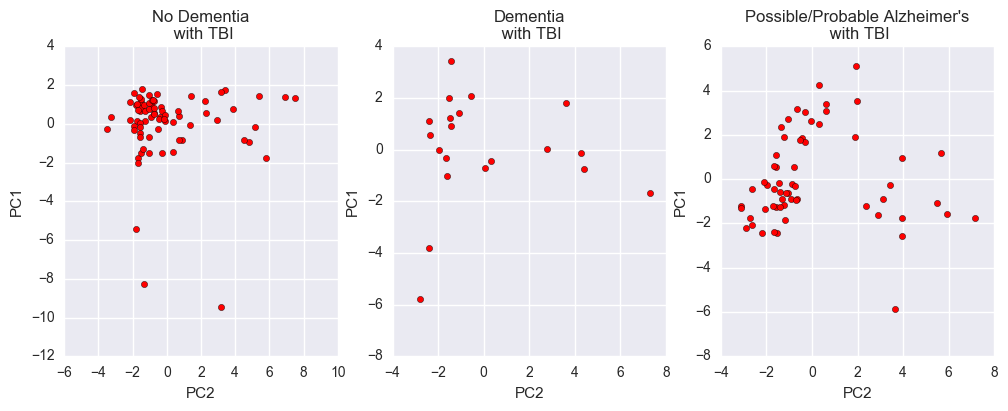

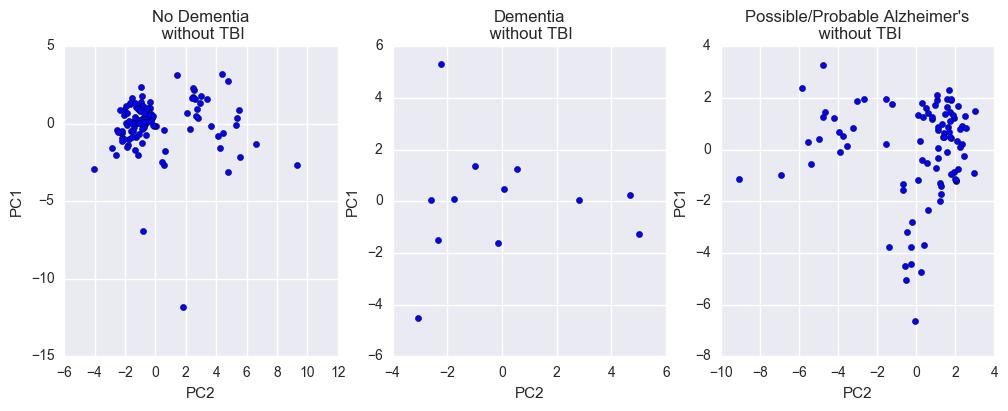

In [40]:
fig = figsize(12, 4)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig, (ax4, ax5, ax6) = plt.subplots(1, 3)

# TBI No Dementia
ax1.scatter(pca_TND[:,0], pca_TND[:,1], c='r')
ax1.set_title('No Dementia\n with TBI')
ax1.set_xlabel('PC2')
ax1.set_ylabel('PC1');

# TBI Dementia
ax2.scatter(pca_TD[:,0], pca_TD[:,1], c='r')
ax2.set_title('Dementia\n with TBI')
ax2.set_xlabel('PC2')
ax2.set_ylabel('PC1');

# TBI Possible & Probable Alzheimer's
ax3.scatter(pca_TPPA[:,0], pca_TPPA[:,1], c='r')
ax3.set_title("Possible/Probable Alzheimer's\n with TBI")
ax3.set_xlabel('PC2')
ax3.set_ylabel('PC1');

# W/o TBI No Dementia
ax4.scatter(pca_ND[:,0], pca_ND[:,1])
ax4.set_title('No Dementia\n without TBI')
ax4.set_xlabel('PC2')
ax4.set_ylabel('PC1');

# W/o TBI Dementia
ax5.scatter(pca_D[:,0], pca_D[:,1])
ax5.set_title('Dementia\n without TBI')
ax5.set_xlabel('PC2')
ax5.set_ylabel('PC1');

# W/o TBI Possible & Probable Alzheimer's
ax6.scatter(pca_PPA[:,0], pca_PPA[:,1])
ax6.set_title("Possible/Probable Alzheimer's\n without TBI")
ax6.set_xlabel('PC2')
ax6.set_ylabel('PC1');


WITH Traumatic Brain Injury: RED

WITHOUT Traumatic Brain Injury: BLUE



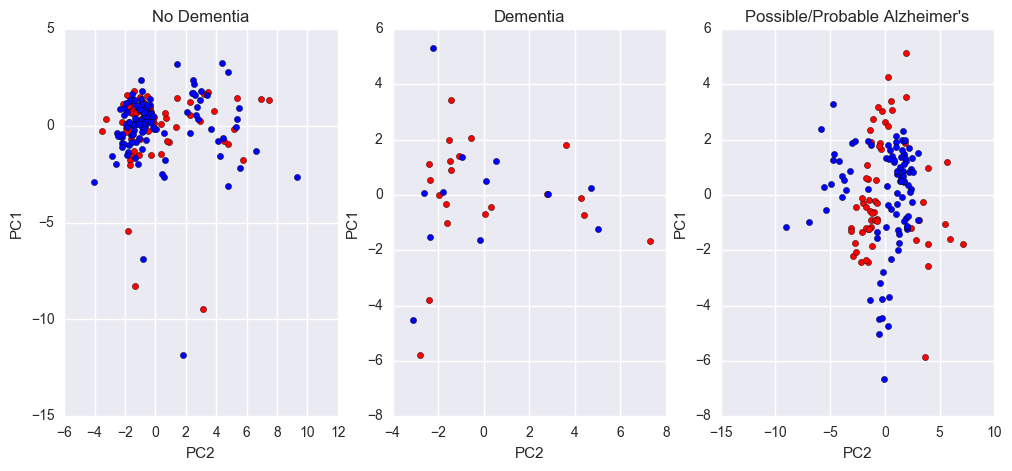

In [71]:
fig = figsize(12, 5)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# TBI No Dementia
ax1.scatter(pca_TND[:,0], pca_TND[:,1], c='r')
ax1.scatter(pca_ND[:,0], pca_ND[:,1])
ax1.set_title('No Dementia')
ax1.set_xlabel('PC2')
ax1.set_ylabel('PC1');

# TBI Dementia
ax2.scatter(pca_TD[:,0], pca_TD[:,1], c='r')
ax2.scatter(pca_D[:,0], pca_D[:,1])
ax2.set_title('Dementia')
ax2.set_xlabel('PC2')
ax2.set_ylabel('PC1');

# TBI Possible & Probable Alzheimer's
ax3.scatter(pca_TPPA[:,0], pca_TPPA[:,1], c='r')
ax3.scatter(pca_PPA[:,0], pca_PPA[:,1])
ax3.set_title("Possible/Probable Alzheimer's")
ax3.set_xlabel('PC2')
ax3.set_ylabel('PC1');

print('WITH Traumatic Brain Injury: RED', end='\n\n')
print('WITHOUT Traumatic Brain Injury: BLUE', end='\n\n')

---
## `Explained Variance & Original Features`

## $$No\ Dementia\ with\ TBI$$
### `Explained Variance` 

In [74]:
### [PCA] TBI - No Dementia ###

X = tbi_nd

mu = tbi_nd.mean(axis=0)

Z = X - mu

V, S_tbi_nd, Vt = np.linalg.svd(Z)
V_tbi_nd = Vt.T  # svd return transpose of V

#Vr = V_tbi_nd[:,0:2]
#print(S_tbi_nd, end='\n\n') # values
#print(Vr) # vectors

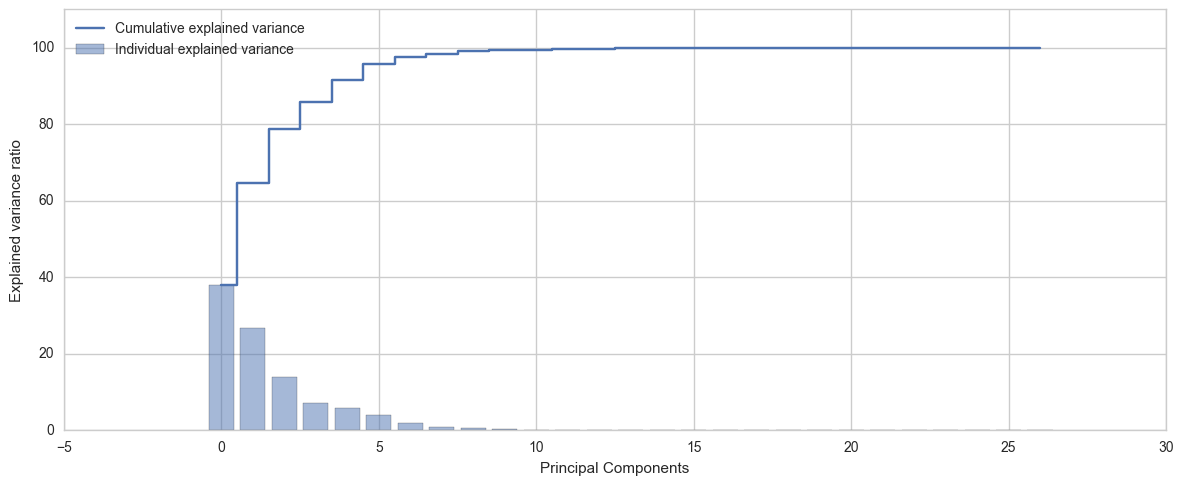

In [112]:
total = sum(S_tbi_nd)
var_exp = [(i / total)*100 for i in sorted(S_tbi_nd, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure()

    plt.bar(range(27), var_exp, alpha=0.5, align='center',
            label='Individual explained variance')
    plt.step(range(27), cum_var_exp, where='mid',
             label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal Components')
    plt.ylim(ymax=110)
    plt.legend(loc='best')
    plt.tight_layout();

>PC1 and PC2 accounts for about $65$% of the Cumulative explained variance

>**Note**: `Charts are Zero-based` - $0$ on these barcharts represents $PC1$ and $1$ represents $PC2$

## $$No\ Dementia\ with\ TBI$$
### `Original Features`

In [76]:
features = ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 
            'ihc_at8', 'ihc_a_beta_ffpe', 'ihc_ptdp_43_ffpe', 
            'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 
            'ptau_ng_per_mg', 'vegf_pg_per_mg', 'tnf_a_pg_per_mg', 
            'tau_ng_per_mg', 'il_10_pg_per_mg', 'isoprostane_pg_per_mg', 
            'il_6_pg_per_mg', 'il_1b_pg_per_mg', 'il_4_pg_per_mg', 
            'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg', 
            'ifn_g_pg_per_mg', 'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 
            'mip_1a_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg']

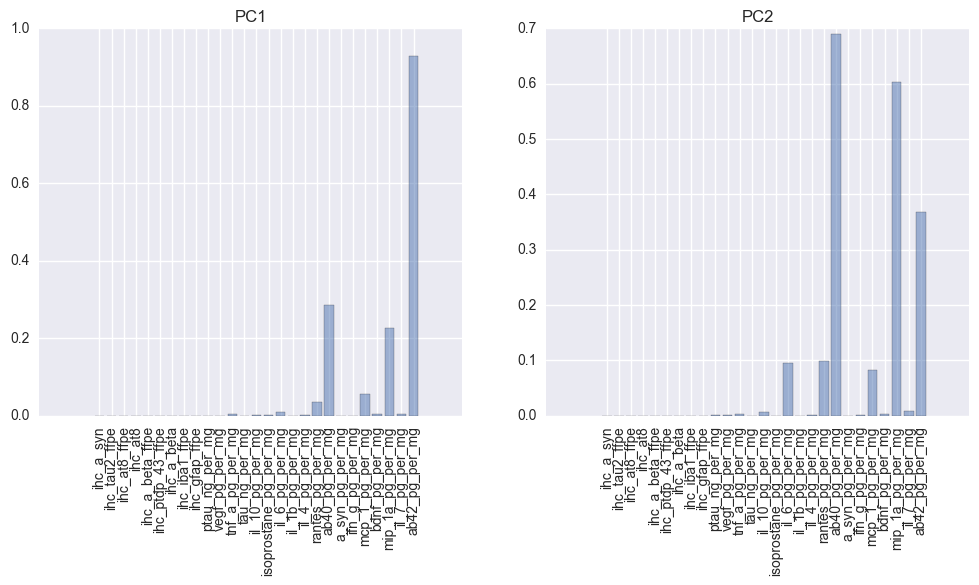

In [93]:
fig = figsize(12, 5)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.bar(range(27), abs(V_tbi_nd[:,0]), alpha=0.5, align='center')
ax1.set_title('PC1')
ax1.set_xticklabels(features, rotation=90)
ax1.set_xticks(range(27));

ax2.bar(range(27), abs(V_tbi_nd[:,1]), alpha=0.5, align='center')
ax2.set_title('PC2')
ax2.set_xticklabels(features, rotation=90)
ax2.set_xticks(range(27));

>### `No Dementia with TBI`  
>### PC1 $->$  ab42_pg_per_mg

>### PC2 $->$  ab40_pg_per_mg

## $$Dementia\ with\ TBI$$
### `Explained Variance` 

In [94]:
### [PCA] TBI - Dementia ###
X = tbi_d

mu = tbi_d.mean(axis=0)

Z = X - mu # np works this out automatically

V, S_tbi_d, Vt = np.linalg.svd(Z)
V_tbi_d = Vt.T  # svd return transpose of V

#Vr = V_tbi_d[:,0:2]
#print(S_tbi_d, end='\n\n') # values
#print(Vr) # vectors

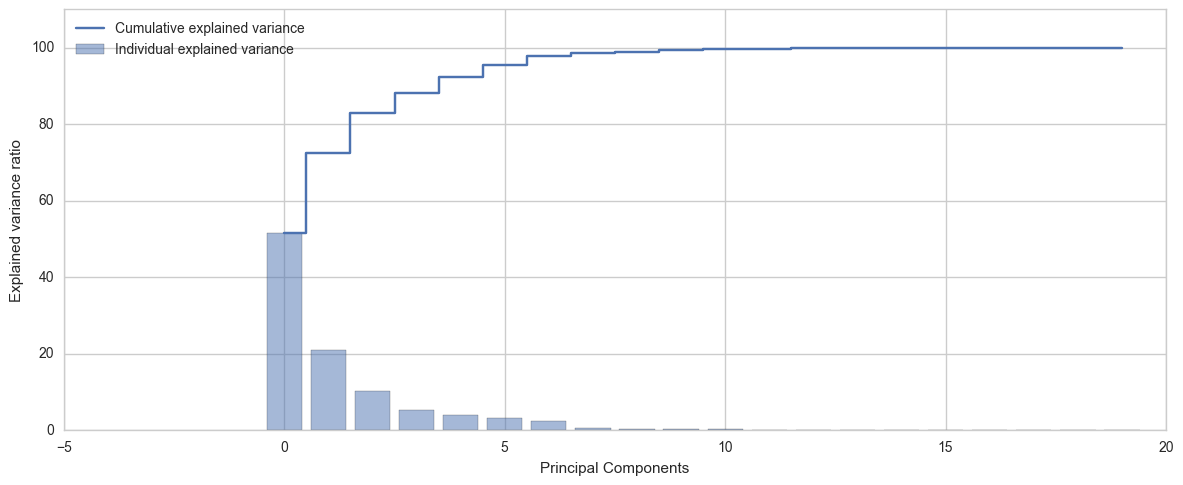

In [111]:
total = sum(S_tbi_d)
var_exp = [(i / total)*100 for i in sorted(S_tbi_d, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure()

    plt.bar(range(20), var_exp, alpha=0.5, align='center',
            label='Individual explained variance')
    plt.step(range(20), cum_var_exp, where='mid',
             label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal Components')
    plt.ylim(ymax=110)
    plt.legend(loc='best')
    plt.tight_layout();

>PC1 and PC2 accounts for a little over $75$% of the Cumulative explained variance

>**Note**: _There is clear drop in the amount of principal components retrieve for this subdivided group. More research and exploration is needed to determine exactly what is causing this outcome._

## $$Dementia\ with\ TBI$$
### `Original Features`

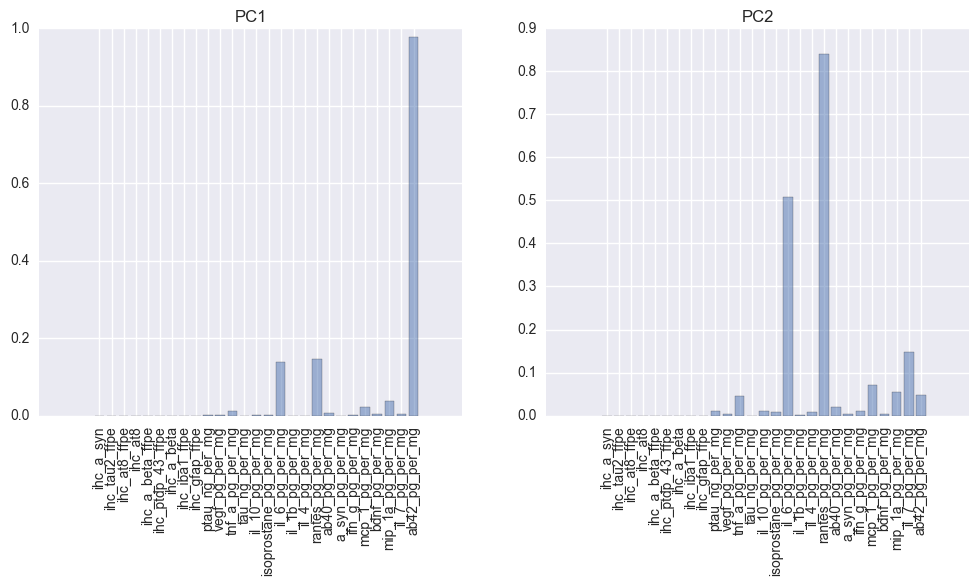

In [120]:
fig = figsize(12, 5)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.bar(range(27), abs(V_tbi_d[:,0]), alpha=0.5, align='center')
ax1.set_title('PC1')
ax1.set_xticklabels(features, rotation=90)
ax1.set_xticks(range(27));

ax2.bar(range(27), abs(V_tbi_d[:,1]), alpha=0.5, align='center')
ax2.set_title('PC2')
ax2.set_xticklabels(features, rotation=90)
ax2.set_xticks(range(27));

>### `Dementia with TBI`  
>### PC1 $->$  ab42_pg_per_mg

>### PC2 $->$  rantes_pg_per_mg

## $$Possible/Probable\ Alzheimer's\ with\ TBI$$
### `Explained Variance` 

In [114]:
### [PCA] TBI - Possible/Probable Alzheimer's ###

X = tbi_ppa

mu = tbi_ppa.mean(axis=0)

Z = X - mu

V, S_tbi_ppa, Vt = np.linalg.svd(Z)
V_tbi_ppa = Vt.T  # svd return transpose of V

#Vr = V[:,0:2]
#print(S_tbi_ppa, end='\n\n') # values
#print(Vr) # vectors

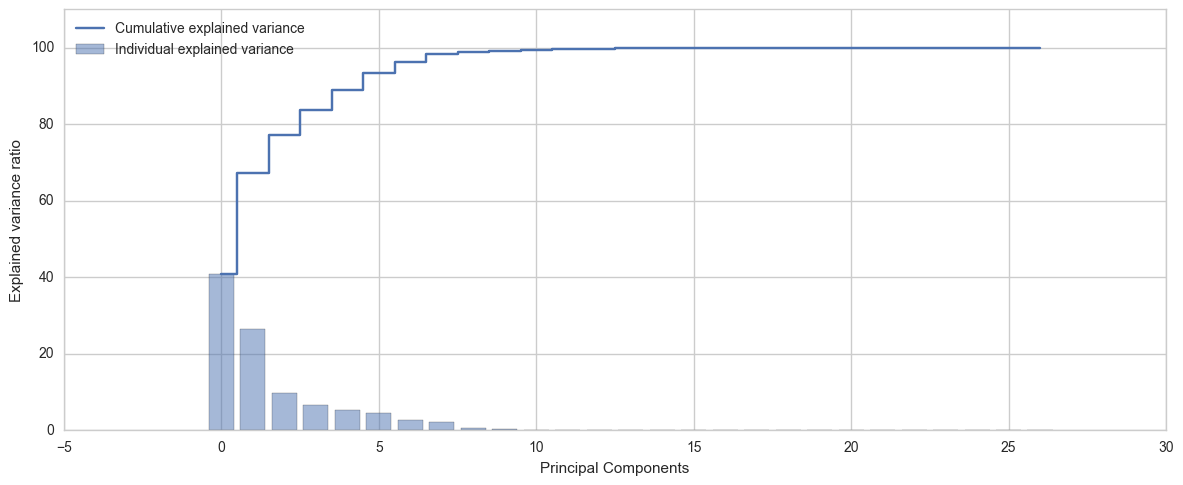

In [116]:
total = sum(S_tbi_ppa)
var_exp = [(i / total)*100 for i in sorted(S_tbi_ppa, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure()

    plt.bar(range(27), var_exp, alpha=0.5, align='center',
            label='Individual explained variance')
    plt.step(range(27), cum_var_exp, where='mid',
             label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal Components')
    plt.ylim(ymax=110)
    plt.legend(loc='best')
    plt.tight_layout();

>PC1 and PC2 accounts for a little under $75$% of the Cumulative explained variance

## $$Possible/Probable\ Alzheimer's\ with\ TBI$$
### `Original Features`

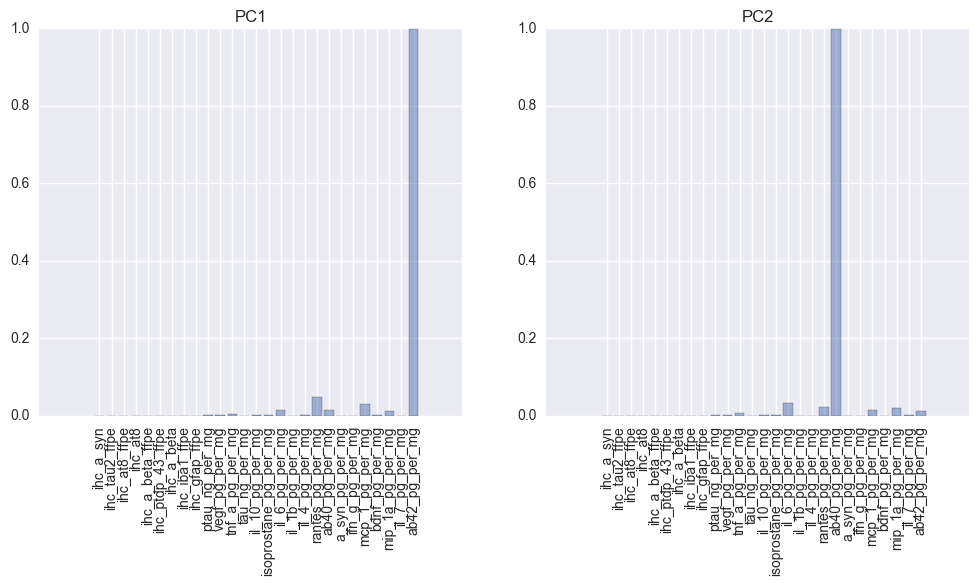

In [117]:
fig = figsize(12, 5)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.bar(range(27), abs(V_tbi_ppa[:,0]), alpha=0.5, align='center')
ax1.set_title('PC1')
ax1.set_xticklabels(features, rotation=90)
ax1.set_xticks(range(27));

ax2.bar(range(27), abs(V_tbi_ppa[:,1]), alpha=0.5, align='center')
ax2.set_title('PC2')
ax2.set_xticklabels(features, rotation=90)
ax2.set_xticks(range(27));

>### `Possible/Probable Alzheimer's with TBI`  
>### PC1 $->$  ab42_pg_per_mg

>### PC2 $->$  ab40_pg_per_mg

---
## $$No\ Dementia\ [ without ]\ TBI$$
### `Explained Variance` 

In [118]:
### [PCA] No Dementia ###

X = wo_tbi_nd

mu = wo_tbi_nd.mean(axis=0)

Z = X - mu

V, S_wo_tbi_nd, Vt = np.linalg.svd(Z)
V_wo_tbi_nd = Vt.T  # svd return transpose of V

#Vr = V_tbi_nd[:,0:2]
#print(S_tbi_nd, end='\n\n') # values
#print(Vr) # vectors

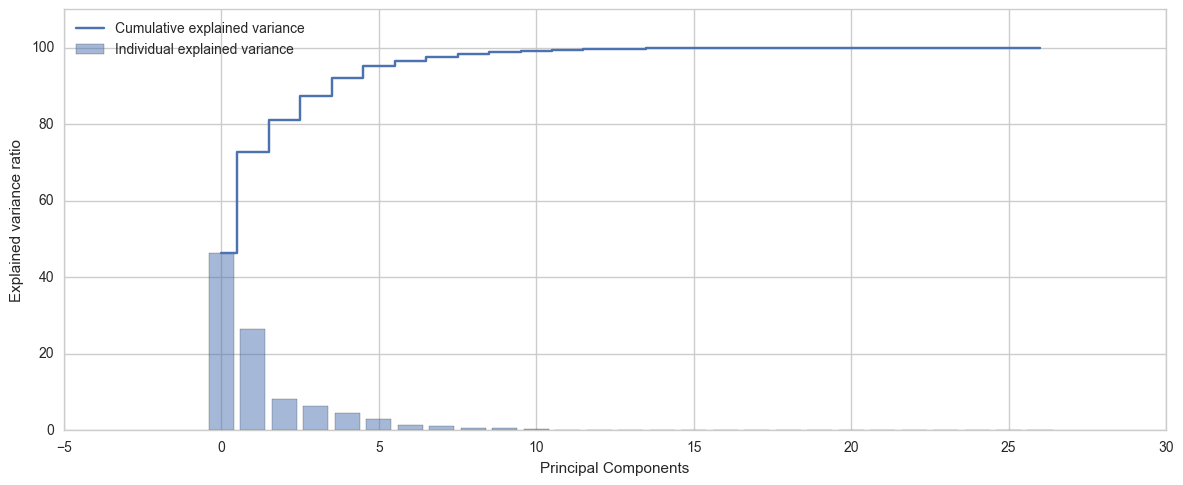

In [119]:
total = sum(S_wo_tbi_nd)
var_exp = [(i / total)*100 for i in sorted(S_wo_tbi_nd, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure()

    plt.bar(range(27), var_exp, alpha=0.5, align='center',
            label='Individual explained variance')
    plt.step(range(27), cum_var_exp, where='mid',
             label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal Components')
    plt.ylim(ymax=110)
    plt.legend(loc='best')
    plt.tight_layout();

>PC1 and PC2 accounts for about $75$% of the Cumulative explained variance

## $$No\ Dementia\ [ without ]\ TBI$$
### `Original Features`

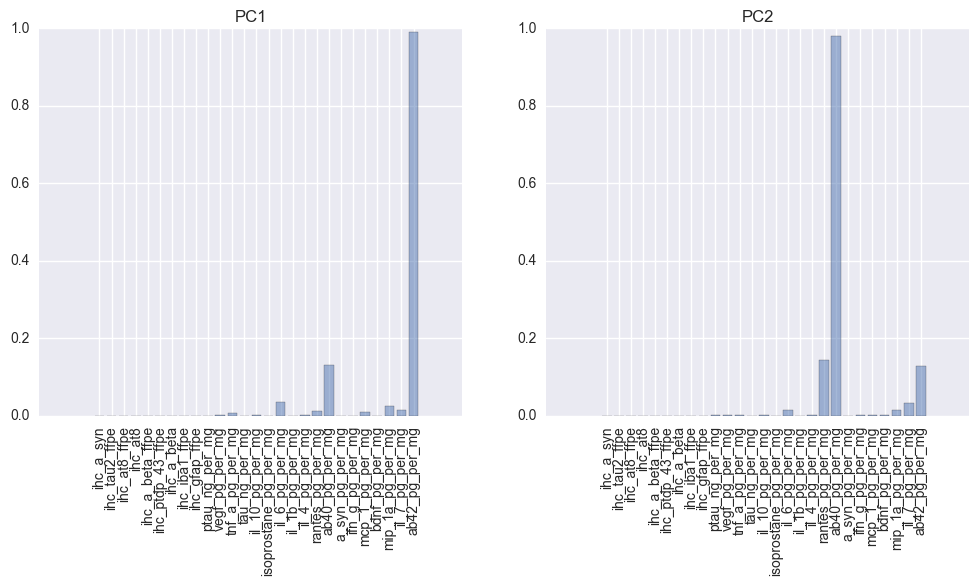

In [121]:
fig = figsize(12, 5)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.bar(range(27), abs(V_wo_tbi_nd[:,0]), alpha=0.5, align='center')
ax1.set_title('PC1')
ax1.set_xticklabels(features, rotation=90)
ax1.set_xticks(range(27));

ax2.bar(range(27), abs(V_wo_tbi_nd[:,1]), alpha=0.5, align='center')
ax2.set_title('PC2')
ax2.set_xticklabels(features, rotation=90)
ax2.set_xticks(range(27));

>### `No Dementia without TBI`  
>### PC1 $->$  ab42_pg_per_mg

>### PC2 $->$  ab40_pg_per_mg

## $$Dementia\ [ without ]\  TBI$$
### `Explained Variance`

In [132]:

X = wo_tbi_d

mu = wo_tbi_d.mean(axis=0)

Z = X - mu

V, S_wo_tbi_d, Vt = np.linalg.svd(Z)
V_wo_tbi_d = Vt.T  # svd return transpose of V

#Vr = V_tbi_nd[:,0:2]
#print(S_wo_tbi_d, end='\n\n') # values
#print(Vr) # vectors

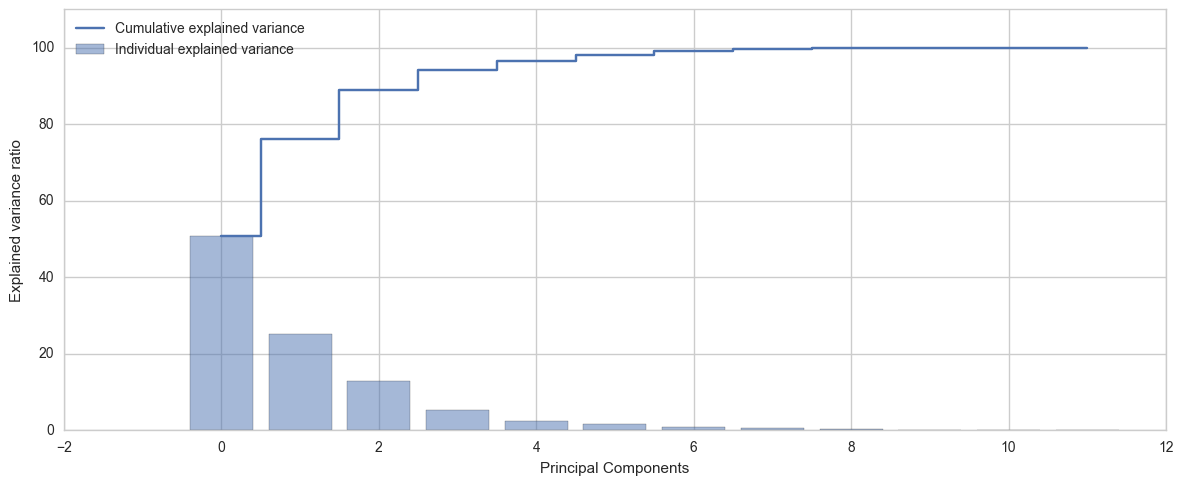

In [133]:
total = sum(S_wo_tbi_d)
var_exp = [(i / total)*100 for i in sorted(S_wo_tbi_d, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure()

    plt.bar(range(12), var_exp, alpha=0.5, align='center',
            label='Individual explained variance')
    plt.step(range(12), cum_var_exp, where='mid',
             label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal Components')
    plt.ylim(ymax=110)
    plt.legend(loc='best')
    plt.tight_layout();

>PC1 and PC2 accounts for about $78$% of the Cumulative explained variance

>**Note**: _There is clear drop in the amount of principal components retrieve for this subdivided group. More research and exploration is needed to determine exactly what is causing this outcome. This effect was also seen in the with TBI and Dementia group._

## $$Dementia\ [ without ]\  TBI$$
### `Original Features`

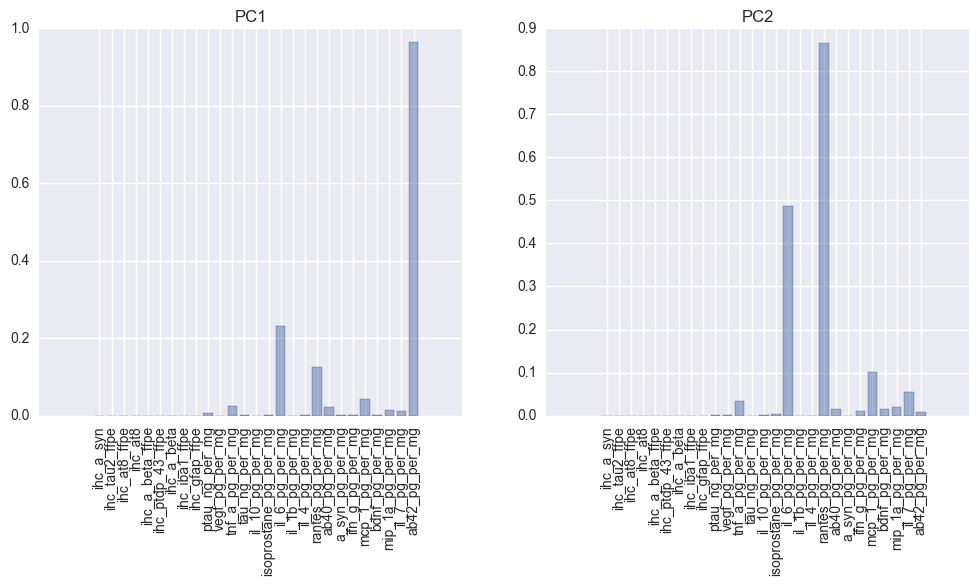

In [134]:
fig = figsize(12, 5)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.bar(range(27), abs(V_wo_tbi_d[:,0]), alpha=0.5, align='center')
ax1.set_title('PC1')
ax1.set_xticklabels(features, rotation=90)
ax1.set_xticks(range(27));

ax2.bar(range(27), abs(V_wo_tbi_d[:,1]), alpha=0.5, align='center')
ax2.set_title('PC2')
ax2.set_xticklabels(features, rotation=90)
ax2.set_xticks(range(27));

>### `Dementia without TBI`  
>### PC1 $->$  ab42_pg_per_mg

>### PC2 $->$  rantes_pg_per_mg

## $$Possible/Probable Alzheimer's\ [ without ]\ TBI$$
### `Explained Variance`

In [135]:
### [PCA] Possible/Probable Alzheimer's ###

X = wo_tbi_ppa

mu = wo_tbi_ppa.mean(axis=0)

Z = X - mu

V, S_wo_tbi_ppa, Vt = np.linalg.svd(Z)
V_wo_tbi_ppa = Vt.T  # svd return transpose of V

#Vr = V_tbi_nd[:,0:2]
#print(S_wo_tbi_nd, end='\n\n') # values
#print(Vr) # vectors

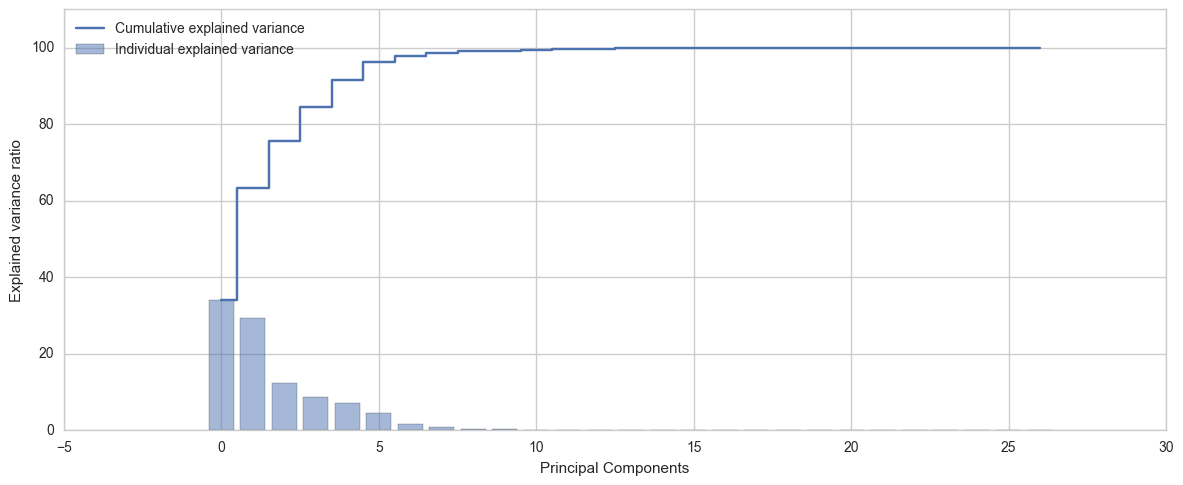

In [136]:
total = sum(S_wo_tbi_ppa)
var_exp = [(i / total)*100 for i in sorted(S_wo_tbi_ppa, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure()

    plt.bar(range(27), var_exp, alpha=0.5, align='center',
            label='Individual explained variance')
    plt.step(range(27), cum_var_exp, where='mid',
             label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal Components')
    plt.ylim(ymax=110)
    plt.legend(loc='best')
    plt.tight_layout();

>PC1 and PC2 accounts for about $62$% of the Cumulative explained variance

## $$Possible/Probable Alzheimer's\ [ without ]\ TBI$$
### `Original Features`

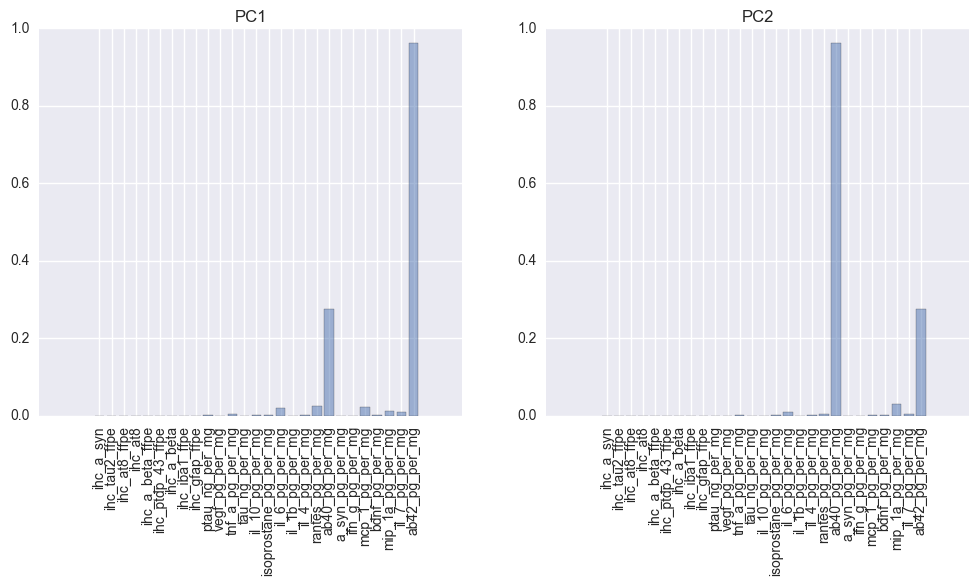

In [137]:
fig = figsize(12, 5)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.bar(range(27), abs(V_wo_tbi_ppa[:,0]), alpha=0.5, align='center')
ax1.set_title('PC1')
ax1.set_xticklabels(features, rotation=90)
ax1.set_xticks(range(27));

ax2.bar(range(27), abs(V_wo_tbi_ppa[:,1]), alpha=0.5, align='center')
ax2.set_title('PC2')
ax2.set_xticklabels(features, rotation=90)
ax2.set_xticks(range(27));

>### `Possible/Probable Alzheimer's without TBI`  
>### PC1 $->$  ab42_pg_per_mg

>### PC2 $->$  ab40_pg_per_mg

---
## $$Derive\ Insights$$

## `Interpret the Results`

* A$\beta$42 and A$\beta$40 


* Rantes

|             | With TBI     |             | Without TBI  |             |
| ----------  | -----------  | ----------- | ------------ | ----------- |
|             |    PC1       |     PC2     |     PC1      |     PC2     |
| No Dementia | $A \beta 42$ |$A \beta 40$ | $A \beta 42$ |$A \beta 40$ |
| Dementia    | $A \beta 42$ |   Rantes    | $A \beta 42$ |   Rantes    |
| Alzheimer's | $A \beta 42$ |$A \beta 40$ | $A \beta 42$ |$A \beta 40$ |

## `Personal Takeaways`

**1.** EDA & Data Wrangling was the majority of the work

**2.** Be an "Active" Learner, willingness to be wrong and learn more as needed

## `Next Steps`

**1.** Increase the Principal Components to **N=3** and account for more variance

**2.** Investigate the phenomenon occurring in the PCs of _Dementia_ groups for both with TBI and without TBI. Does increasing to **N=3** make any difference?

**3.** Perform PCA with the _Metadata and RNA-seq data_

**4.** Perform Predictions on with TBI and without TBI groups to test accuracy between them 